Hello reader. This is Kennedy YIM. This Jupyter notebook shows basically my conversancy in scripting in Python 3.5. Down from here I demostrated my very foundational skills in system package check, the famous Iris dataset for playing around various machine learning models. 

P.s. You will see I focused on various built-in supervised machine learning models( Logistic Regression (LR), Linear Discriminant Analysis (LDA), K-Nearest Neighbors (KNN), Classification and Regression Trees (CART), Gaussian Naive Bayes (NB), 
Support Vector Machines (SVM). They were taken to fit out for the best model for further prediction. Then we took the classification result from the chosen best model to compare with the actual data as the back test to see how accruate the chosen model can match for the flower type. 

## 0.'''system check'''

In [ ]:
'''system check'''
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

<html heading># Import sklearn modules</html>

import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## 1. DataSet 

In [8]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)


In [9]:
# head
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [10]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [11]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## 2. Data Visualization
We have two types of plots:

a,Univariate plots to better understand each attribute.
b, Multivariate plots to better understand the relationships between attributes.
2.1 Univariate Plots
We start with some univariate plots, that is, plots of each individual variable.

Given that the input variables are numeric, we can create box and whisker plots of each.

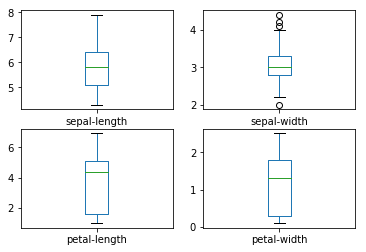

In [12]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

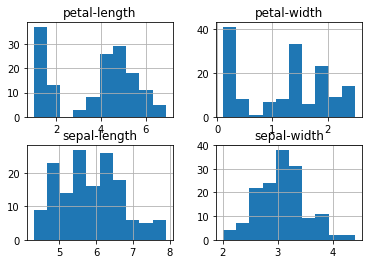

In [13]:
# histograms
dataset.hist()
plt.show()

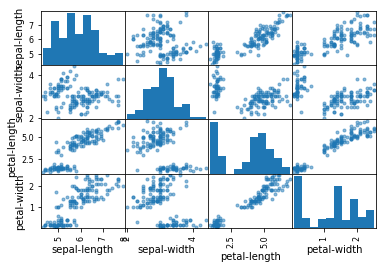

In [15]:
### scatter plot matrix
scatter_matrix(dataset)
plt.show()

## 3. Evaluate Some Algorithms
I create some models of the data and estimate their accuracy on unseen data.

Here is what we are going to cover in this step:

1. Separate out a validation dataset.
2. Set-up the test harness to use 10-fold cross validation.
3. Build 5 different models to predict species from flower measurements
4. Select the best model.

3.1 Create a Validation Dataset
We need to know that the model we created is any good.

Later, we will use statistical methods to estimate the accuracy of the models that we create on unseen data. We also want a more concrete estimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data.

That is, we are going to hold back some data that the algorithms will not get to see and we will use this data to get a second and independent idea of how accurate the best model might actually be.

We will split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset.

3.2 Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

You now have training data in the X_train and Y_train for preparing models and a X_validation and Y_validation sets that we can use later.

3.2 Test Harness
We will use 10-fold cross validation to estimate accuracy.

This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

In [17]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

We are using the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

3.3 Build Models
We don’t know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s evaluate 6 different algorithms:

Logistic Regression (LR)
Linear Discriminant Analysis (LDA)
K-Nearest Neighbors (KNN).
Classification and Regression Trees (CART).
Gaussian Naive Bayes (NB).
Support Vector Machines (SVM).
--> Examples of simple linear are LR and LDA; examples of nonlinear are KNN, CART, NB and SVM algorithms. 
The random number seed are reset before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.

In [18]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


'''------------------------------------------'''

It looks like KNN has the largest estimated accuracy score.

We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. 

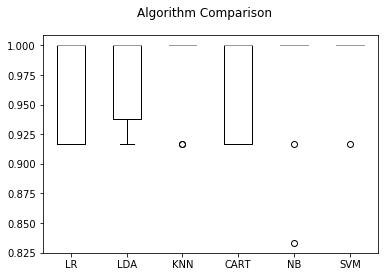

In [19]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 6. Make Predictions
The KNN algorithm was the most accurate model that we tested. Now we want to get an idea of the accuracy of the model on our validation set.

This will give us an independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case you made a slip during training, such as overfitting to the training set or a data leak. Both will result in an overly optimistic result.

We can run the KNN model directly on the validation set and summarize the results as a final accuracy score, a confusion matrix and a classification report.

In [20]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



We can see that the accuracy is 0.9 or 90%. The confusion matrix provides an indication of the three errors made. Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset was small).

                        ~End of page ~